# Add scalebars to height maps

In [3]:
import sys
import time
import numpy as np

from scipy import ndimage, interpolate

from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
from matplotlib import colorbar
get_ipython().magic('matplotlib inline')
import os
import glob
import re
import pickle
import pandas
from PIL import Image
import pandas as pd
import cv2
from numba import jit

from matplotlib.patches import Rectangle


In [4]:
ScaleBarXlen = 57;
ScaleBarYlen = 57;

In [13]:
img_list = glob.glob('ruminate/*.jpg')

In [16]:

for img_name in img_list:
    img = cv2.imread(img_name, cv2.IMREAD_GRAYSCALE)
    IMAGE_ROWS = len(img)
    IMAGE_COLS = len(img[0])
    ScaleBarCol = IMAGE_COLS - 30 # X of scalebar origin (bottom-right)
    ScaleBarRow = IMAGE_ROWS - 30 
    for r in range(ScaleBarRow-5, ScaleBarRow):
        for c in range(ScaleBarCol-ScaleBarXlen, ScaleBarCol):
            img[r][c] = 255
    for r in range(ScaleBarRow-ScaleBarYlen, ScaleBarRow):
        for c in range(ScaleBarCol-5, ScaleBarCol):
            img[r][c] = 255

    cv2.putText(img=img, 
                text='500 um', 
                org=(ScaleBarCol-60, ScaleBarRow + 15),
               fontFace = cv2.FONT_HERSHEY_SIMPLEX,
               fontScale=0.6,
               color=255,
                thickness=2)
    cv2.imwrite(os.path.join('output',img_name.split('/')[-1]),img)

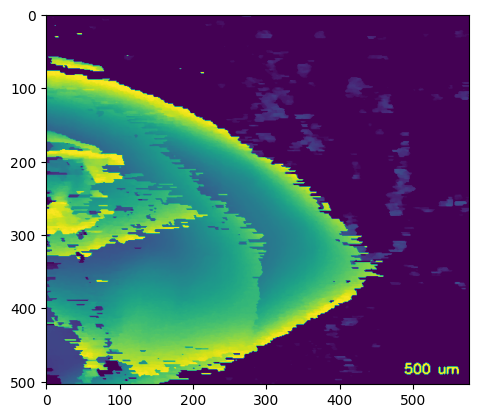

In [8]:
plt.imshow(img, cmap='gray')